i. Obtain the least squares solution wML to the regression problem using the ana-
lytical solution.

In [39]:
# imports
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import csv
import random

In [40]:
# data
X_train = []
y_train = []
with open('A2Q2Data_train.csv') as file:    
    csv_reader = csv.reader(file)    
    for row in csv_reader:  
        row = np.array(row)
        row = row.astype(float)

        X_train.append(row[:-1])
        y_train.append(row[-1])


X_train = np.array(X_train).T
y_train = np.array(y_train)
y_train = np.expand_dims(y_train, axis = 1)

In [41]:
X_train.shape

(100, 10000)

In [42]:
y_train.shape

(10000, 1)

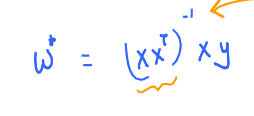

In [43]:
w_ml = np.linalg.inv(X_train@X_train.T) @ X_train @ y_train

In [44]:
w_ml

array([[-7.84961009e-03],
       [-1.36715320e-02],
       [-3.61656438e-03],
       [ 2.64909160e-03],
       [ 1.88551446e-01],
       [ 2.65314657e-03],
       [ 9.46531786e-03],
       [ 1.79809481e-01],
       [ 3.73757317e-03],
       [ 4.99608944e-01],
       [ 8.35836265e-03],
       [ 4.29108775e-03],
       [ 1.42141179e-02],
       [ 3.94232414e-03],
       [ 9.36795890e-03],
       [-1.12038274e-03],
       [ 3.35727500e-03],
       [ 1.16152212e-03],
       [-9.40884707e-03],
       [-2.45575476e-03],
       [-1.17409629e-02],
       [-1.01960612e-02],
       [ 7.95771321e-03],
       [-1.00574854e-02],
       [ 6.04882939e-03],
       [-4.67345192e-03],
       [-3.09091547e-03],
       [ 8.14909193e-03],
       [ 1.20264599e-02],
       [-6.82458163e-03],
       [-8.65405539e-03],
       [ 9.86273479e-04],
       [ 4.92968011e-03],
       [ 5.99772461e-03],
       [-1.34667860e-02],
       [ 1.07075729e-03],
       [ 1.32745992e-02],
       [-1.14148742e-02],
       [-2.0

ii. Code the gradient descent algorithm with suitable step size to solve the least
squares algorithms and plot ‖wt − wML‖2 as a function of t. What do you
observe?

![Alt text](image.png)

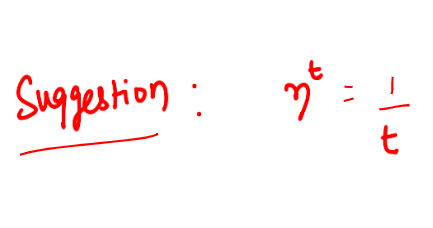

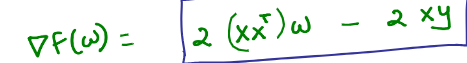

In [45]:
w_gd = np.random.rand(100,1)

epochs = 50
diff = np.zeros(epochs)

for i in range(epochs):
    n = 0.00001/ (i + 1)
    w_gd = w_gd - n * (2*X_train@X_train.T@w_gd - 2 * X_train @ y_train)

    diff[i] = np.linalg.norm(w_ml - w_gd)

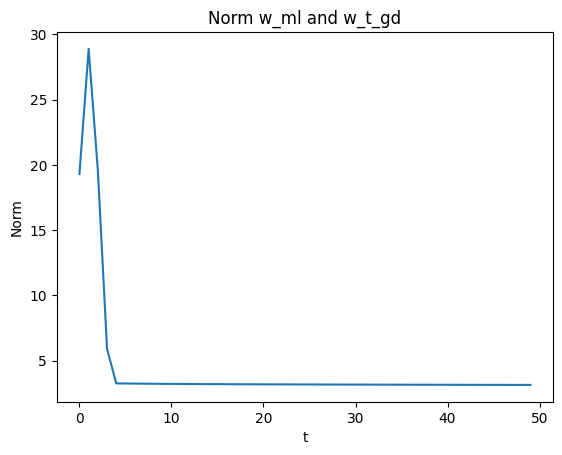

In [46]:
plt.title("Norm w_ml and w_t_gd")
plt.xlabel("t")
plt.ylabel("Norm")
plt.plot(np.linspace(0,epochs-1,epochs),diff)

iii. Code the stochastic gradient descent algorithm using batch size of 100 and plot
‖wt −wML‖2 as a function of t. What are your observations?

In [47]:
batch_size = 100
total_data = X_train.shape[1]
num_features = X_train.shape[0]
w_sgd = np.random.rand(100, 1)
w = 0
epochs = 4000
diff = np.zeros(epochs)

In [48]:
X_train.shape

(100, 10000)

In [49]:
for i in range(epochs):
    X_batch = np.zeros((num_features, batch_size))
    y_batch = np.zeros((batch_size,1))
    batch_index = random.sample(range(total_data),batch_size) 
    for j in range(batch_size):
        X_batch[:, j] = X_train[:, batch_index[j]]
        y_batch[j][0] = y_train[batch_index[j]]

    n = 0.0015/ (i + 1)
    w_sgd = w_sgd - n * (2*X_batch @ X_batch.T @ w_sgd - 2 * X_batch @ y_batch)

    diff[i] = np.linalg.norm(w_ml - w_sgd)
    w = w + w_sgd

w = w/ epochs

In [50]:
w.shape

(100, 1)

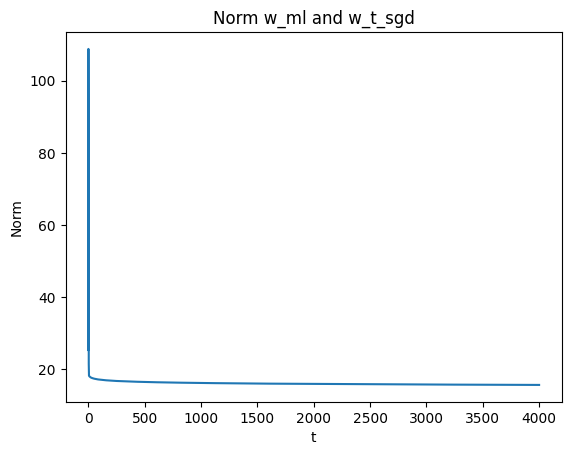

In [51]:
plt.title("Norm w_ml and w_t_sgd")
plt.xlabel("t")
plt.ylabel("Norm")
plt.plot(np.linspace(0,epochs-1,epochs),diff)

iv. Code the gradient descent algorithm for ridge regression. Cross-validate for var-
ious choices of λ and plot the error in the validation set as a function of λ. For
the best λ chosen, obtain wR. Compare the test error (for the test data in the
file A2Q2Data test.csv) of wR with wML. Which is better and why?

In [52]:
lamdaa_set = np.linspace(0,20,30)
epochs = 1000

In [53]:
lamdaa_set

array([ 0.        ,  0.68965517,  1.37931034,  2.06896552,  2.75862069,
        3.44827586,  4.13793103,  4.82758621,  5.51724138,  6.20689655,
        6.89655172,  7.5862069 ,  8.27586207,  8.96551724,  9.65517241,
       10.34482759, 11.03448276, 11.72413793, 12.4137931 , 13.10344828,
       13.79310345, 14.48275862, 15.17241379, 15.86206897, 16.55172414,
       17.24137931, 17.93103448, 18.62068966, 19.31034483, 20.        ])

In [54]:
W = {}

In [55]:
X_train_cv = X_train[:, :int(0.8*total_data)]
y_train_cv = y_train[ :int(0.8*total_data)]

X_val_cv = X_train[:, int(0.8*total_data):]
y_val_cv = y_train[int(0.8*total_data):]

In [56]:
for lambdaa in lamdaa_set:
    w_gd_cv = np.random.rand(100,1)

    for i in range(epochs):
        n = 0.0001/(i+1)
        w_gd_cv = w_gd_cv - n * (2*X_train_cv@X_train_cv.T@w_gd_cv - 2 * X_train_cv @ y_train_cv - 2*lambdaa*w_gd_cv)
    
    W[str(lambdaa)] = w_gd_cv


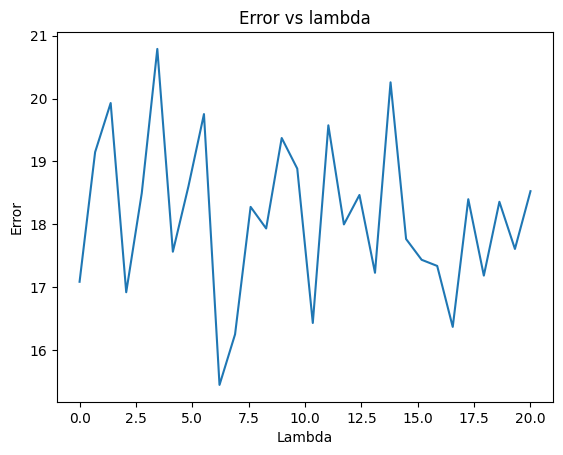

In [57]:
error = []
for i, lambdaa in enumerate(lamdaa_set):
    error.append(np.linalg.norm(y_val_cv - X_val_cv.T@W[str(lambdaa)]))  
plt.plot(lamdaa_set,error)
plt.title("Error vs lambda")
plt.xlabel("Lambda")
plt.ylabel("Error")
plt.show()

In [58]:
min_error_index = np.argmin(error)
print(lamdaa_set[min_error_index])

6.206896551724139


In [63]:
lambdaa = lamdaa_set[min_error_index]

w_r = np.random.rand(100,1)

for i in range(epochs):
    n = 0.0001/(i+1)
    w_r = w_r - n * (2*X_train_cv@X_train_cv.T@w_r - 2 * X_train_cv @ y_train_cv - 2*lambdaa*w_r)



In [64]:
# data
X_test = []
y_test = []
with open('A2Q2Data_train.csv') as file:    
    csv_reader = csv.reader(file)    
    for row in csv_reader:  
        row = np.array(row)
        row = row.astype(float)

        X_test.append(row[:-1])
        y_test.append(row[-1])


X_test = np.array(X_test).T
y_test = np.array(y_test)
y_test = np.expand_dims(y_test, axis = 1)

In [66]:
print(f"error for W_ml is {np.linalg.norm(y_test-X_test.T@w_ml)}")
print(f"error for W_r {np.linalg.norm(y_test-X_test.T@w_r)}")

error for W_ml is 19.921456237616056
error for W_r 41.30573639172386
